In [1]:
import pandas as pd

In [2]:
disease_id_to_category = {
    "01": "Bacterial Infections and Mycoses",        
    "02": "Virus Diseases",
    "03": "Parasitic Diseases",
    "04": "Neoplasms",
    "05": "Musculoskeletal Diseases",
    "06": "Digestive System Diseases",
    "07": "Stomatognathic Diseases",
    "08": "Respiratory Tract Diseases",
    "09": "Otorhinolaryngologic Diseases",
    "10": "Nervous System Diseases",
    "11": "Eye Diseases",
    "12": "Male Urogenital Diseases",
    "13": "Female Urogenital Diseases and Pregnancy Complications",
    "14": "Cardiovascular Diseases",
    "15": "Hemic and Lymphatic Diseases",
    "16": "Congenital, Hereditary, and Neonatal Diseases and Abnormalities1",
    "17": "Skin and Connective Tissue Diseases",
    "18": "Nutritional and Metabolic Diseases",
    "19": "Endocrine System Diseases",
    "20": "Immune System Diseases",
    "21": "Disorders of Environmental Origin",
    "22": "Animal Diseases",
    "23": "Pathological Conditions, Signs and Symptoms",
    "24": "Occupational Diseases",        
    "25": "Chemically-Induced Disorders",
    "26": "Wounds and Injuries"   
}

In [4]:
df = pd.read_csv("../data/all_med_18th_jan.csv")
df.count()

nct_id                  294679
brief_title             294679
official_title          284373
conditions_list         238142
eligibility_criteria    293793
description             293873
keywords_list           197827
pub_med_id               48856
dtype: int64

In [5]:
df.columns

Index(['nct_id', 'brief_title', 'official_title', 'conditions_list',
       'eligibility_criteria', 'description', 'keywords_list', 'pub_med_id'],
      dtype='object')

In [6]:
df1 = df.dropna(subset=['pub_med_id', 'conditions_list'])

In [7]:
df1.shape

(41034, 8)

In [8]:
df1.columns

Index(['nct_id', 'brief_title', 'official_title', 'conditions_list',
       'eligibility_criteria', 'description', 'keywords_list', 'pub_med_id'],
      dtype='object')

In [9]:
import pickle
meshToDisease = pickle.load(open("../data/meshToDiseaseMapping.p", "rb"))

In [10]:
nct_list = df1['nct_id'].tolist()

In [11]:
mesh_Word = set()
countDisease = {}
nct_disease_dict = {}
disease_clinical_trials_dict = {}
ctr = 0
for row in df1['conditions_list']:
    nct_id = nct_list[ctr]
    nct_disease_dict[nct_id] = set()
    for mesh in row.split(';')[:-1]:
#         print(mesh)
        if mesh in meshToDisease.keys():
            for disease in meshToDisease[mesh]:
#                 print(disease)
                nct_disease_dict[nct_id].add(disease)
                if disease in countDisease:
                    countDisease[disease] += 1
                else:
                    countDisease[disease] = 1
                    
                if disease in disease_clinical_trials_dict:
                    disease_clinical_trials_dict[disease].add(nct_id)
                else:
                    disease_clinical_trials_dict[disease] = {nct_id}
                    
    ctr += 1

In [12]:
def disease_set_to_string(diseaseSet):
    if len(diseaseSet)==0:
        return "NA"
    
    res = ""
    for disease in diseaseSet:
        res += disease_id_to_category[disease]
        res += ";"
    return res

In [13]:
ctr = 0
nctDiseaseValue = []
for a, b in zip(df1['nct_id'], nct_disease_dict):
#     print(a, b)
    nctDiseaseValue.append(disease_set_to_string(nct_disease_dict[b]))
df1['Diseases'] = pd.Series(nctDiseaseValue, index=df1.index)

/home/mt1/17CS60R70/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
disease_clinical_trials_dict

{'04': {'NCT00114829',
  'NCT00204529',
  'NCT00149396',
  'NCT02369198',
  'NCT00425750',
  'NCT00532441',
  'NCT00382954',
  'NCT00003012',
  'NCT00697047',
  'NCT00609622',
  'NCT01212991',
  'NCT00729287',
  'NCT03100708',
  'NCT00424099',
  'NCT02331251',
  'NCT00118040',
  'NCT02319928',
  'NCT02388906',
  'NCT00952783',
  'NCT00625846',
  'NCT00469599',
  'NCT00988858',
  'NCT00967824',
  'NCT01225302',
  'NCT01491217',
  'NCT00948064',
  'NCT01072097',
  'NCT01870791',
  'NCT00785330',
  'NCT00995358',
  'NCT02060253',
  'NCT00715208',
  'NCT02051751',
  'NCT01132534',
  'NCT00959946',
  'NCT00002839',
  'NCT00430781',
  'NCT00340808',
  'NCT00355862',
  'NCT01186367',
  'NCT00965718',
  'NCT01969448',
  'NCT00086996',
  'NCT01539317',
  'NCT01254890',
  'NCT00709891',
  'NCT00980018',
  'NCT01442649',
  'NCT00474006',
  'NCT00369850',
  'NCT02018367',
  'NCT00943800',
  'NCT01226576',
  'NCT01157988',
  'NCT00742144',
  'NCT00180115',
  'NCT00083889',
  'NCT00865189',
  'NCT01

In [15]:
diseaseToNctIdsDictWithKeyAsDiseaseName = {}
for key in disease_clinical_trials_dict.keys():
    diseaseToNctIdsDictWithKeyAsDiseaseName[disease_id_to_category[key]] = list(disease_clinical_trials_dict[key])

In [16]:
diseaseToNctIdsDictWithKeyAsDiseaseName

{'Neoplasms': ['NCT00114829',
  'NCT00204529',
  'NCT00149396',
  'NCT02369198',
  'NCT00425750',
  'NCT00532441',
  'NCT00382954',
  'NCT00003012',
  'NCT00697047',
  'NCT00609622',
  'NCT01212991',
  'NCT00729287',
  'NCT03100708',
  'NCT00424099',
  'NCT02331251',
  'NCT00118040',
  'NCT02319928',
  'NCT02388906',
  'NCT00952783',
  'NCT00625846',
  'NCT00469599',
  'NCT00988858',
  'NCT00967824',
  'NCT01225302',
  'NCT01491217',
  'NCT00948064',
  'NCT01072097',
  'NCT01870791',
  'NCT00785330',
  'NCT00995358',
  'NCT02060253',
  'NCT00715208',
  'NCT02051751',
  'NCT01132534',
  'NCT00959946',
  'NCT00002839',
  'NCT00430781',
  'NCT00340808',
  'NCT00355862',
  'NCT01186367',
  'NCT00965718',
  'NCT01969448',
  'NCT00086996',
  'NCT01539317',
  'NCT01254890',
  'NCT00709891',
  'NCT00980018',
  'NCT01442649',
  'NCT00474006',
  'NCT00369850',
  'NCT02018367',
  'NCT00943800',
  'NCT01226576',
  'NCT01157988',
  'NCT00742144',
  'NCT00180115',
  'NCT00083889',
  'NCT00865189',
 

In [36]:
pickle.dump(diseaseToNctIdsDictWithKeyAsDiseaseName, open("../output/allDiseaseNamesToNctIdsListDict.p", "wb"))

In [17]:
y = []
x = []
labels = []
dict_n = {}
for key in sorted(disease_clinical_trials_dict):
    print(disease_id_to_category[key] + ":" + str(len(disease_clinical_trials_dict[key])))
    x.append(disease_id_to_category[key])
    y.append(len(disease_clinical_trials_dict[key]))
    labels.append(key)
    dict_n[len(disease_clinical_trials_dict[key])] = disease_id_to_category[key]

Bacterial Infections and Mycoses:2433
Virus Diseases:2660
Parasitic Diseases:562
Neoplasms:7398
Musculoskeletal Diseases:2386
Digestive System Diseases:4142
Stomatognathic Diseases:540
Respiratory Tract Diseases:4600
Otorhinolaryngologic Diseases:522
Nervous System Diseases:6172
Eye Diseases:1015
Male Urogenital Diseases:2494
Female Urogenital Diseases and Pregnancy Complications:3110
Cardiovascular Diseases:7293
Hemic and Lymphatic Diseases:2370
Congenital, Hereditary, and Neonatal Diseases and Abnormalities1:1860
Skin and Connective Tissue Diseases:2809
Nutritional and Metabolic Diseases:5240
Endocrine System Diseases:3588
Immune System Diseases:5016
Disorders of Environmental Origin:6
Animal Diseases:53
Pathological Conditions, Signs and Symptoms:12826
Occupational Diseases:27
Chemically-Induced Disorders:703
Wounds and Injuries:1070


In [18]:
for key in reversed(sorted(dict_n)):
    print(dict_n[key], ":", key)

Pathological Conditions, Signs and Symptoms : 12826
Neoplasms : 7398
Cardiovascular Diseases : 7293
Nervous System Diseases : 6172
Nutritional and Metabolic Diseases : 5240
Immune System Diseases : 5016
Respiratory Tract Diseases : 4600
Digestive System Diseases : 4142
Endocrine System Diseases : 3588
Female Urogenital Diseases and Pregnancy Complications : 3110
Skin and Connective Tissue Diseases : 2809
Virus Diseases : 2660
Male Urogenital Diseases : 2494
Bacterial Infections and Mycoses : 2433
Musculoskeletal Diseases : 2386
Hemic and Lymphatic Diseases : 2370
Congenital, Hereditary, and Neonatal Diseases and Abnormalities1 : 1860
Wounds and Injuries : 1070
Eye Diseases : 1015
Chemically-Induced Disorders : 703
Parasitic Diseases : 562
Stomatognathic Diseases : 540
Otorhinolaryngologic Diseases : 522
Animal Diseases : 53
Occupational Diseases : 27
Disorders of Environmental Origin : 6


In [19]:
disease_to_diseaseNumber = {
    "Bacterial Infections and Mycoses": "01",        
    "Virus Diseases": "02",
    "Parasitic Diseases": "03",
    "Neoplasms": "04",
    "Musculoskeletal Diseases": "05",
    "Digestive System Diseases": "06",
    "Stomatognathic Diseases": "07",
    "Respiratory Tract Diseases": "08",
    "Otorhinolaryngologic Diseases": "09",
    "Nervous System Diseases": "10",
    "Eye Diseases": "11",
    "Male Urogenital Diseases": "12",
    "Female Urogenital Diseases and Pregnancy Complications": "13",
    "Cardiovascular Diseases": "14",
    "Hemic and Lymphatic Diseases": "15",
    "Congenital, Hereditary, and Neonatal Diseases and Abnormalities1": "16",
    "Skin and Connective Tissue Diseases": "17",
    "Nutritional and Metabolic Diseases": "18",
    "Endocrine System Diseases": "19",
    "Immune System Diseases": "20",
    "Disorders of Environmental Origin": "21",
    "Animal Diseases": "22",
    "Pathological Conditions, Signs and Symptoms":"23",
    "Occupational Diseases":"24",        
    "Chemically-Induced Disorders":"25",
    "Wounds and Injuries":"26"   
}

In [1]:
for key in reversed(sorted(dict_n)):
    diseaseName = dict_n[key]
    print(dict_n[key], ":", key)

NameError: name 'dict_n' is not defined

In [20]:
index = 1
for key in reversed(sorted(dict_n)):
    diseaseName = dict_n[key]
    print(dict_n[key], ":", key)
    
    number = disease_to_diseaseNumber[dict_n[key]]
    print(number)
    
    output_path = "../output/all_disease_class_csv_files/" + str(index) + "_" + diseaseName + "_" + str(key) + ".csv"
    df1.loc[df1['nct_id'].isin(disease_clinical_trials_dict[number])].to_csv(output_path, index=False)
#     df1.loc[df1['nct_id'].isin()].to_csv("../output/ + str(index) + "_" + dict_n[key] + ".csv", index=False)                                                                 
#     if index == 6:
#         break
    index += 1
    

Pathological Conditions, Signs and Symptoms : 12826
23
Neoplasms : 7398
04
Cardiovascular Diseases : 7293
14
Nervous System Diseases : 6172
10
Nutritional and Metabolic Diseases : 5240
18
Immune System Diseases : 5016
20
Respiratory Tract Diseases : 4600
08
Digestive System Diseases : 4142
06
Endocrine System Diseases : 3588
19
Female Urogenital Diseases and Pregnancy Complications : 3110
13
Skin and Connective Tissue Diseases : 2809
17
Virus Diseases : 2660
02
Male Urogenital Diseases : 2494
12
Bacterial Infections and Mycoses : 2433
01
Musculoskeletal Diseases : 2386
05
Hemic and Lymphatic Diseases : 2370
15
Congenital, Hereditary, and Neonatal Diseases and Abnormalities1 : 1860
16
Wounds and Injuries : 1070
26
Eye Diseases : 1015
11
Chemically-Induced Disorders : 703
25
Parasitic Diseases : 562
03
Stomatognathic Diseases : 540
07
Otorhinolaryngologic Diseases : 522
09
Animal Diseases : 53
22
Occupational Diseases : 27
24
Disorders of Environmental Origin : 6
21


In [47]:
import matplotlib.pyplot as plt

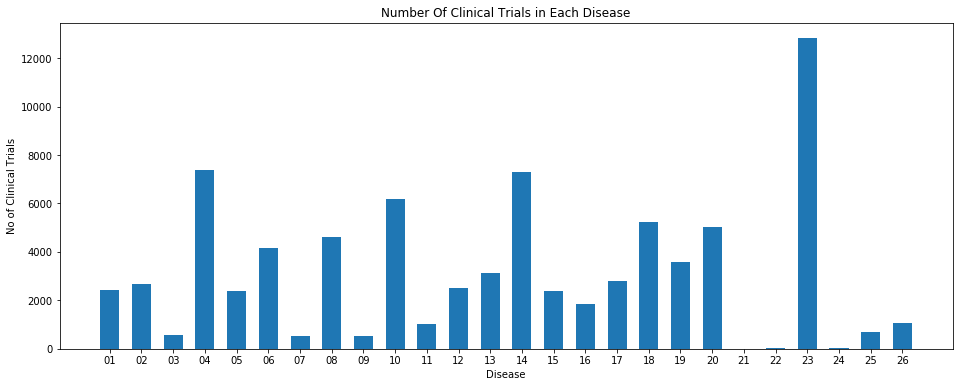

In [54]:
def plot_bar_x(labels, x, y):
    # this is for plotting purpose
#     index = np.arange(len(label))
    x = [disease_to_diseaseNumber[item] for item in x]
    plt.figure(figsize=(16,6))
    plt.bar(labels, y, width=0.6)
    plt.xlabel('Disease')
    plt.ylabel('No of Clinical Trials')
#     plt.xticks(labels, x, fontsize=5, rotation=30)
    plt.xticks(labels, x, rotation=0)
 
    # Text on the top of each barplot
#     for i in range(len(y)):
#         plt.text(x = y[i]-0.5 , y = y[i]+0.1, s = y[i], size = 16)

    plt.title('Number Of Clinical Trials in Each Disease')
    
#     plt.legend(labels, x)
    plt.savefig("../results/disease_vs_numberOfClinicalTrials")
    plt.show()
plot_bar_x(labels, x, y)